# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data is related with direct marketing campaigns of a Portuguese banking institution. 

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored and if there was a success (the target variable). For the whole database considered, there were 6499 successes (8% success rate).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.exceptions import ConvergenceWarning

# import data processing libraries
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree



# import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB


In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 12


In [9]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
# Count the number of clients who subscribed and did not subscribe
subscription_counts = df['y'].value_counts()

print("Number of clients who subscribed vs. did not subscribe:")
print(subscription_counts)

Number of clients who subscribed vs. did not subscribe:
y
no     36537
yes     4639
Name: count, dtype: int64


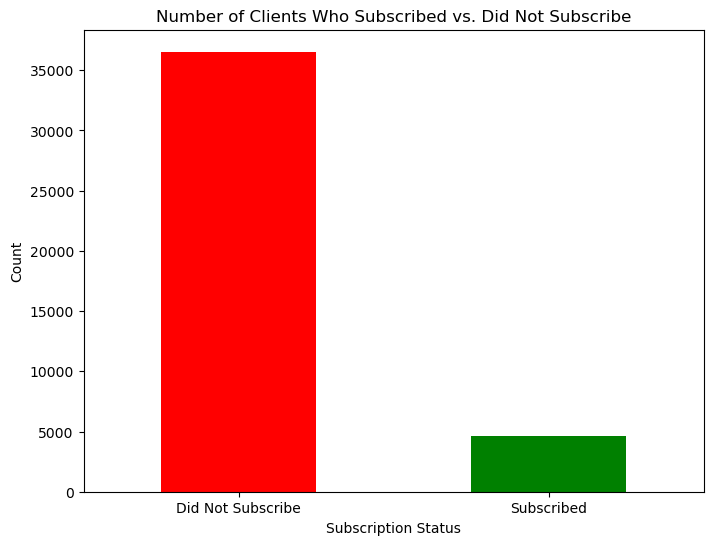

In [20]:
plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Number of Clients Who Subscribed vs. Did Not Subscribe')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Did Not Subscribe', 'Subscribed'], rotation=0)
plt.show()

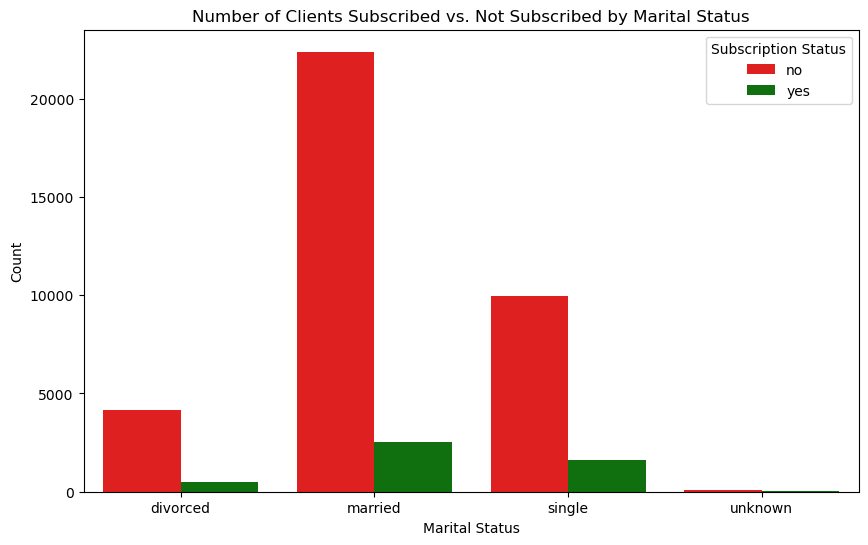

In [21]:
# Count the number of subscriptions by marital status
marital_subscription_counts = df.groupby(['marital', 'y']).size().reset_index(name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='marital', y='Count', hue='y', data=marital_subscription_counts, palette={'yes': 'green', 'no': 'red'})
plt.title('Number of Clients Subscribed vs. Not Subscribed by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.show()

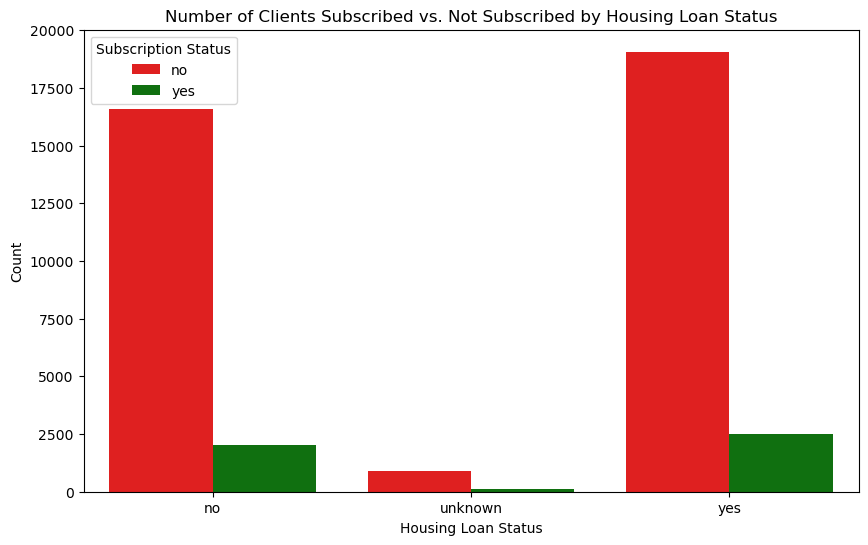

In [22]:
# Count the number of subscriptions by housing loan status
housing_subscription_counts = df.groupby(['housing', 'y']).size().reset_index(name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='housing', y='Count', hue='y', data=housing_subscription_counts, palette={'yes': 'green', 'no': 'red'})
plt.title('Number of Clients Subscribed vs. Not Subscribed by Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.show()

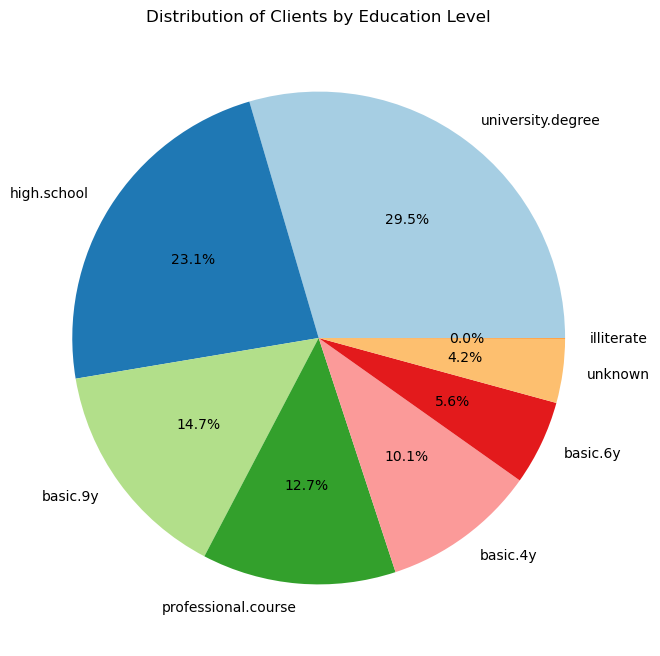

In [23]:
# Count the number of clients by education level
education_counts = df['education'].value_counts()

# Plotting a pie chart with Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(education_counts))))
plt.title('Distribution of Clients by Education Level')
plt.show()

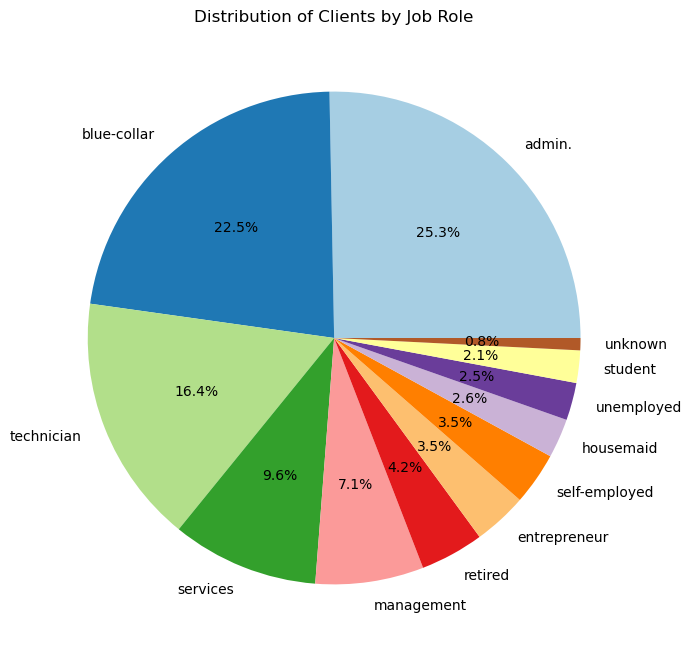

In [24]:
# Count the number of clients by job role
job_counts = df['job'].value_counts()

# Plotting a pie chart with Matplotlib
plt.figure(figsize=(10, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(job_counts))))
plt.title('Distribution of Clients by Job Role')
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The goal is to build a model to predict who accepts/denies the offer. This will help the sales to better target audience based on a specific criteria who are more inclined to accept the offer

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [26]:

# Define the order of categories for ordinal features
education_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_of_week_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

# Initialize OrdinalEncoder with defined categories
ordinal_encoder = OrdinalEncoder(categories=[education_order, month_order, day_of_week_order])

# Fit and transform ordinal features
df[['education', 'month', 'day_of_week']] = ordinal_encoder.fit_transform(df[['education', 'month', 'day_of_week']])


In [27]:

# List of categorical features to encode with LabelEncoder
nominal_features = ['job', 'marital', 'housing', 'loan', 'contact', 'poutcome', 'default', 'y']

# Initialize LabelEncoder
label_encoders = {feature: LabelEncoder() for feature in nominal_features}

# Fit and transform each categorical feature
for feature in nominal_features:
    df[feature] = label_encoders[feature].fit_transform(df[feature])


In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,2.0,0,0,0,1,4.0,0.0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,5.0,1,0,0,1,4.0,0.0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,5.0,0,2,0,1,4.0,0.0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,3.0,0,0,0,1,4.0,0.0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,5.0,0,0,2,1,4.0,0.0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
df.count()

age               41176
job               41176
marital           41176
education         41176
default           41176
housing           41176
loan              41176
contact           41176
month             41176
day_of_week       41176
duration          41176
campaign          41176
pdays             41176
previous          41176
poutcome          41176
emp.var.rate      41176
cons.price.idx    41176
cons.conf.idx     41176
euribor3m         41176
nr.employed       41176
y                 41176
dtype: int64

In [36]:
#filtering to include only the important features
selected_df = df[['age','job','marital','default','housing','loan','education','y']]
selected_df.head()

,age,job,marital,default,housing,loan,education,y
0,56,3,1,0,0,0,2.0,0
1,57,7,1,1,0,0,5.0,0
2,37,7,1,0,2,0,5.0,0
3,40,0,1,0,0,0,3.0,0
4,56,7,1,0,0,2,5.0,0


In [37]:
X = selected_df.drop('y',axis=1)
y = selected_df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [39]:
X = StandardScaler().fit_transform(X)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

The baseline performance for the model should have at least 85% accuracy.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [43]:
def train_model(model):
    # Start time
    m_start = time.time()
    
    # Train the model
    m = model.fit(X_train, y_train)
    
    # End time
    m_end = time.time()
    
    # Calculate fit time
    m_fit_time = m_end - m_start
    
    # Scores
    m_train_score = m.score(X_train,y_train)
    m_test_score = m.score(X_test,y_test)
    
    return m_train_score, m_test_score, m_fit_time

In [44]:
lgr = LogisticRegression()
lgr_train_score,lgr_test_score,lgr_fit_time=train_model(lgr)
print(lgr_train_score,lgr_test_score,lgr_fit_time)

0.8886406320834143 0.8834272391684477 0.022259235382080078


### Problem 9: Score the Model

What is the accuracy of your model?

In [45]:
accuracy_score(y_test,lgr.predict(X_test))

0.8834272391684477

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [46]:
#KNN
knn = KNeighborsClassifier()
knn_train_score,knn_test_score,knn_fit_time = train_model(knn)
print(knn_train_score,knn_test_score,knn_fit_time)

0.8913282818470306 0.874489994171362 0.02818894386291504


In [47]:
#Decision Tree
dtree = DecisionTreeClassifier()
dtree_train_score,dtree_test_score,dtree_fit_time = train_model(dtree)
print(dtree_train_score,dtree_test_score,dtree_fit_time)

0.9176866783239428 0.8633184379250048 0.05620765686035156


In [48]:
#SVC
svc = SVC()
svc_train_score,svc_test_score,svc_fit_time = train_model(svc)
print(svc_train_score,svc_test_score,svc_fit_time)

0.8892882585324785 0.8831358072663688 35.850000858306885


In [50]:
# build a dataframe with model performances
model_dict = {
    'model': ['LogisticRegression','KNN','DecisionTreeClassifier','SVC'],
    'train_time':[lgr_fit_time,knn_fit_time,dtree_fit_time,svc_fit_time],
    'train_score':[lgr_train_score,knn_train_score,dtree_train_score,svc_train_score],
    'test_score':[lgr_test_score,knn_test_score,dtree_test_score,svc_test_score]
}

model_perf_df = pd.DataFrame(model_dict)
model_perf_df.head()

,model,train_time,train_score,test_score
0,LogisticRegression,0.022259,0.888641,0.883427
1,KNN,0.028189,0.891328,0.874490
2,DecisionTreeClassifier,0.056208,0.917687,0.863318
3,SVC,35.850001,0.889288,0.883136


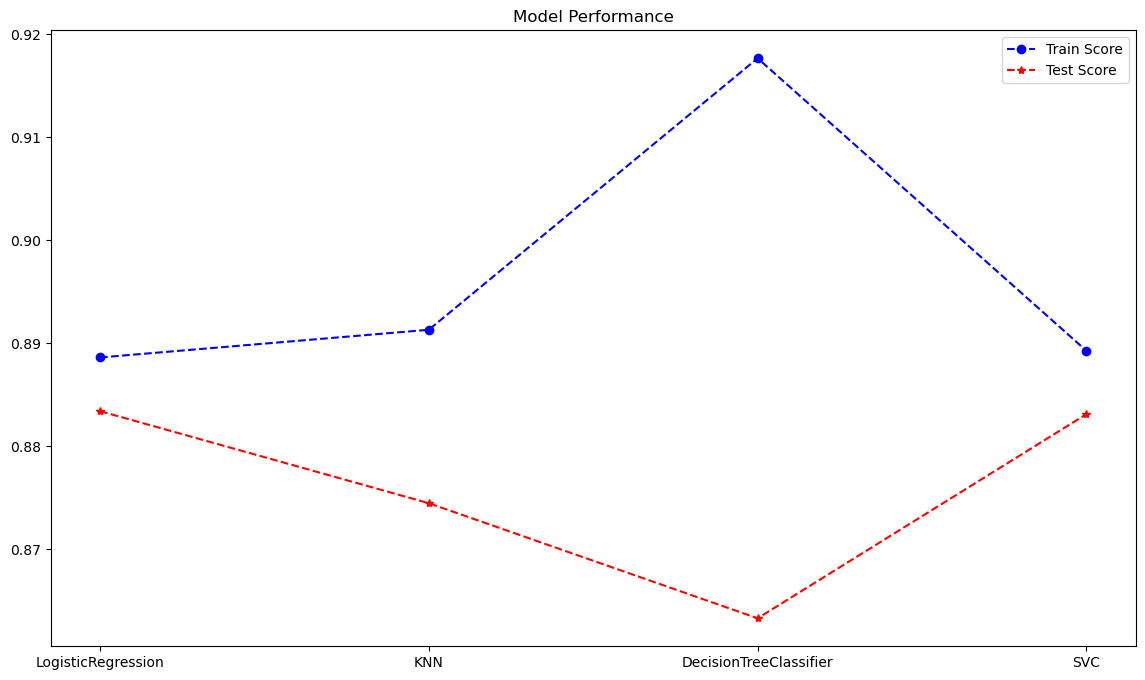

In [54]:
# plot for train and test scores
plt.figure(figsize=(14,8))
plt.title('Model Performance')
plt.plot(model_perf_df['model'],model_perf_df['train_score'],label='Train Score',linestyle='--',marker='o',color='b')
plt.plot(model_perf_df['model'],model_perf_df['test_score'],label='Test Score',linestyle='--',marker='*',color='r')
plt.legend()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [55]:
def tune_model(model,grid_params):
    gs = GridSearchCV(model,param_grid=grid_params, scoring="accuracy", cv=5,n_jobs=-1).fit(X_train,y_train)
    gs_train_score = gs.score(X_train,y_train)
    gs_test_score = gs.score(X_test,y_test)
    return gs,gs_train_score,gs_test_score

In [59]:
lgr_m = LogisticRegression()
parameters = {
    "penalty":["l1", "l2", "elasticnet"],
    "C": [1,10,50,100],
    "max_iter": [1000,2000,3000],
    "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
lgr_gs,lgr_train_score,lgr_test_score = tune_model(lgr_m,parameters)
print(lgr_gs.best_estimator_)
print(lgr_gs.best_score_)

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')
0.8886406334798739


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_mo

In [57]:
knn_m = KNeighborsClassifier()
params = {
    "n_neighbors": np.array(range(1,8)) # picked the neighbours of the features counts
}
knn_gs,knn_gs_train_score,knn_gs_test_scaore = tune_model(knn_m,params)
print(knn_gs.best_estimator_)
print(knn_gs.best_score_)

KNeighborsClassifier(n_neighbors=6)
0.8854024016051524


In [58]:
tree_m = DecisionTreeClassifier()
tree_parameter = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_gs,tree_gs_train_score,tree_gs_test_score = tune_model(tree_m,tree_parameter)
print(tree_gs.best_estimator_)
print(tree_gs.best_score_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)
0.8860824481760433


In [60]:

svc_m = SVC(random_state=42)
svc_parameter = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
svc_gs,svc_gs_train_score,svc_gs_test_score = tune_model(svc_m,svc_parameter)
print(svc_gs.best_estimator_)
print(svc_gs.best_score_)

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

##### Questions